In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def trap(Xa,Ya):
    return np.sum((Ya[:-1]+Ya[1:])*(np.diff(Xa))/2)

def simp(Xa,Ya):
    count=0.0
    for i in range(0,len(Xa),2):
        if i+2<len(Xa): 
            count+=((Xa[i]-Xa[2+i])*\
                ((2*Xa[i]-3*Xa[1+i]+Xa[2+i])*\
                 (-Xa[1+i]+Xa[2+i])*\
                 Ya[i]-(Xa[i]-Xa[2+i])**2*\
                 Ya[1+i]+(Xa[i]-Xa[1+i])*\
                 (Xa[i]-3*Xa[1+i]+2*Xa[2+i])*Ya[2+i]))/\
            (6*(Xa[i]-Xa[1+i])*(Xa[1+i]-Xa[2+i]))
    return count

#Utilizando los métodos de integración vistos en clase, inclusive Markov-Chain Monte Carlo, calcular las siguientes integrales
#2.1
def sen(x):
    if x!=0:
        return np.sin(x)/x
    else: # evitar la singularidad
        return 1.0
    
#Integrales Trapezoide
X=np.arange(0,1e5,1.0)
Y=[]
for i in X:
    Y.append(sen(i))
Y=np.array(Y)
resultado=trap(X,Y)
print("resultado: {}\t error cuadrático: {}".format(resultado,(resultado-np.pi/2)**2))

#Integrales Simpson
resultado=simp(X,Y)
print("resultado: {}\t error cuadrático: {}".format(resultado,(resultado-np.pi/2)**2))

#Oscilatorias
def phi(t,k): 
    if t!=0.0:
        return t/(1-np.exp(-k*np.sinh(t)))
    else: 
        return 1/k

def phi_dx(t,k):
    if t!=0:
        return (1-(1+t*k*np.cosh(t))*np.exp(-k*np.sinh(t)))/((1-np.exp(-k*np.sinh(t)))**2)
    else:  
        return 0.5

def g(t,k,M):  
    return sen(M*phi(t,k))*M*phi_dx(t,k)

k=50
M=800
λ=np.pi
h=λ/M
n=250

puntos_X=[]
puntos_Y=[]

for i in range(-n,n):
    puntos_X.append(i*h)
    puntos_Y.append(g(i*h,k,M))

 
X=np.linspace(-.25,.5,5000)
Y=[]
for i in X:
    Y.append(g(i,50,800))


plt.plot(X,Y)
plt.scatter(puntos_X,puntos_Y,c='k',label="puntos para sumar",zorder=10,s=4)
plt.xlim(-0.25,.5)
plt.title("2.1 después de la sustitución")
plt.legend()

resultado=h*sum(puntos_Y)
print("resultado: {}\t error cuadrático: {}".format(resultado,(resultado-np.pi/2)**2))



#2.2
def sin_singularidad(x):
    if x!=0:
        return 1/np.sqrt(x)
    else:
        return 0.0

X=np.linspace(0,1,100000)
Y=[]
for i in X:
    Y.append(sin_singularidad(i))
Y=np.array(Y)



resultado=trap(X,Y)
print("resultado Trapezoide: {}\t error cuadrático Trapezoide: {}".format(resultado,(resultado-2)**2))




#Valor Medio
n_val=-np.random.uniform(-1.0,0.0,10**7) 
resultado=np.mean(1/np.sqrt(n_val))
print("resultado: {}\t error cuadrático: {}".format(resultado,(resultado-2)**2))
N=10**np.arange(2,7,0.1)
prom=[]
for i in N:
    n_val=-np.random.uniform(-1.0,0.0,int(i))
    resultado=np.mean(1/np.sqrt(n_val))
    prom.append(resultado)
prom=np.array(prom)
plt.title("Valor Medio")
plt.scatter(N,(prom-2)**2)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("n")
plt.ylabel("Diferencia Cuadrática")



#Malla
X=np.sort(10**np.arange(-12,12,1e-4))
Y=np.exp(-X)*np.log(X)
resultado=trap(X,Y)
print("resultado Trapezoide: {}\t error cuadrático Trapezoide: {}".format(resultado,(resultado+np.euler_gamma)**2))
resultado=simp(X,Y)
print("resultado Simpson: {}\t error cuadrático Simpson: {}".format(resultado,(resultado+np.euler_gamma)**2))



#2.3
def dos_c(t):
    return (np.exp(-np.arctanh(t))*np.log(np.arctanh(t)))/(1-t**2)
dos_c=np.vectorize(dos_c)

n_val=-np.random.uniform(-1.0,0.0,10**5)
resultado=np.mean(dos_c(n_val))
print("resultado Valor Medio: {}\t error cuadrático Valor Medio: {}".format(resultado,(resultado+np.euler_gamma)**2))


#2.4
def dos_d(x,y,n):
    return abs(np.arctan(x)-np.arctan(y))**n*np.exp(-0.5*np.arctanh(x)**2-0.5*np.arctanh(y)**2)/(2*np.pi*(1-x**2)*(1-y**2))

N=10
nmax=50000
n_val=2*np.random.rand(nmax,2)-1
valores=np.zeros_like(n_val)
for i in range(nmax):
    valores[i]+=dos_d(n_val[i,0],n_val[i,1],0)
resultado=2**2*np.mean(valores)
print("resultado: {}\t error cuadrático: {}".format(resultado,(resultado-1)**2))
pairs=range(0,2*N+2,2)
odd=range(1,2*N+2,2)
resultado_pairs=np.zeros(len(pairs))
resultado_odd=np.zeros(len(odd))

for i in range(len(pairs)):
    n_val=2*np.random.rand(nmax,2)-1
    valores=np.zeros(nmax)
    for j in range(nmax):
        valores[j]+=dos_d(n_val[j,0],n_val[j,1],pairs[i])
    resultado_pairs[i]+=2**2*np.mean(valores)
    print("integrado n={}".format(pairs[i]),end="\r")
    
for i in range(len(odd)):
    n_val=2*np.random.rand(nmax,2)-1
    valores=np.zeros_like(n_val)
    for j in range(nmax):
        valores[j]+=dos_d(n_val[j,0],n_val[j,1],odd[i])
    resultado_odd[i]+=2**2*np.mean(valores)
    print("integrado n={}".format(odd[i]),end="\r")
    
plt.title("Pares - Impares")
plt.scatter(pairs,resultado_pairs,label="pares")
plt.scatter(odd,resultado_odd,label="impares")
plt.yscale("log")
plt.legend(loc=1)


#2.5
def dos_e(x,y,z,n):
    l=[x,y,z]
    return abs(np.arctanh(l[0])-np.arctanh(l[1]))**n*\
        abs(np.arctanh(l[0])-np.arctanh(l[2]))**n*abs(np.arctanh(l[1])-np.arctanh(l[2]))**n*\
        np.exp(-0.5*np.arctanh(l[0])**2-0.5*np.arctanh(l[1])**2-0.5*np.arctanh(l[2])**2)/\
        ((2*np.pi)**(3/2)*(1-l[0]**2)*(1-l[1]**2)*(1-l[2]**2))

N=10
nmax=50000
n_val=2*np.random.rand(nmax,3)-1
valores=np.zeros_like(n_val)
for i in range(nmax):
    valores[i]+=dos_e(n_val[i,0],n_val[i,1],n_val[i,2],0)
resultado=2**3*np.mean(valores)
print("resultado : {}\t error cuadrático: {}".format(resultado,(resultado-1)**2))


pairs=range(0,2*N+2,2)
odd=range(1,2*N+2,2)
resultado_pairs=np.zeros(len(pairs))
resultado_odd=np.zeros(len(odd))

for i in range(len(pairs)):
    n_val=2*np.random.rand(nmax,3)-1
    valores=np.zeros(nmax)
    for j in range(nmax):
        valores[j]+=dos_e(n_val[j,0],n_val[j,1],n_val[j,2],pairs[i])
    resultado_pairs[i]+=2**3*np.mean(valores)
    print("integrado n={}  ".format(pairs[i]),end="\r")
    
for i in range(len(odd)):
    n_val=2*np.random.rand(nmax,3)-1
    valores=np.zeros_like(n_val)
    for j in range(nmax):
        valores[j]+=dos_e(n_val[j,0],n_val[j,1],n_val[j,2],odd[i])
    resultado_odd[i]+=2**3*np.mean(valores)
    print("integrado n={}  ".format(odd[i]),end="\r")
    
print("completado                    ")
plt.title("2.5 pairs odd")
plt.scatter(pairs,resultado_pairs,label="pairs")
plt.scatter(odd,resultado_odd,label="odd")
plt.yscale("log")
plt.ylim(0.1,np.max([resultado_pairs,resultado_odd]))
plt.legend()






ModuleNotFoundError: No module named 'scipy'

In [2]:
#3
#a
vector=np.zeros( (4*10**4,2) )
vector[:,0]+=1.0
vector


#b
np.random.seed(13)
vector[:,1]+=np.random.exponential(1.0,4*10**4)
vector


#c
T=[1,10,100,1000,10000]
s=0.0
counter=0
results=[]
for i in range(len(vector[:,1])):
    s+=vector[:,1][i]     
    if counter<len(T) and s>=T[counter]: 
        results.append(i) 
        counter+=1 
results




#d
def experimento():
    N=4*10**4
    T=10**np.arange(0,5)
    vec=np.cumsum(np.random.exponential(size=N))  
    vals=np.zeros_like(T)
    for i in range(len(T)):
        padded=vec*(vec>=T[i])  
        padded[padded==0.0]=np.nan 
        vals[i]+=np.nanargmin(padded)  
    return vals

np.random.seed(13)
experimento()
veces=3*10**4
%time resultados=np.array(list(map(lambda t: experimento(),np.zeros(veces))))




#e
fig = plt.figure(constrained_layout=False,
grill = fig.add_gridspec(nrows=3, ncols=2)
col1 = fig.add_subplot(grill[0, 0])
col2 = fig.add_subplot(grill[0, 1])
col3 = fig.add_subplot(grill[1, 0])
col4 = fig.add_subplot(grill[1, 1])
col5 = fig.add_subplot(grill[2, :])


bins=np.arange(min(resultados.T[0]),max(resultados.T[0])+1,1)-0.5
col1.hist(resultados.T[0],bins,density=True,rwidth=0.7)
col1.set_title("T={}".format(T[0]))


bins=np.arange(min(resultados.T[1]),max(resultados.T[1])+1,1)-0.5
col2.hist(resultados.T[1],bins,density=True,rwidth=0.8)
col2.set_title("T={}".format(T[1]))


bins=np.arange(min(resultados.T[2]),max(resultados.T[2])+1,2)-1
col3.hist(resultados.T[2],bins,density=True,rwidth=0.7)
col3.set_title("T={}".format(T[2]))

bins=np.arange(min(resultados.T[3]),max(resultados.T[3])+1,5)-1
col4.hist(resultados.T[3],bins,density=True,rwidth=0.7)
col4.set_title("T={}".format(T[3]));

bins=np.arange(min(resultados.T[4]),max(resultados.T[4])+1,20)-5
col5.hist(resultados.T[4],bins,density=True,rwidth=0.7)
col5.set_title("T={}".format(T[4]));



#f
from scipy.stats import poisson

fig = plt.figure(constrained_layout=False,figrillize=(10,15))
grill = fig.add_gridspec(nrows=3, ncols=2)
col1 = fig.add_subplot(grill[0, 0])
col2 = fig.add_subplot(grill[0, 1])
col3 = fig.add_subplot(grill[1, 0])
col4 = fig.add_subplot(grill[1, 1])
col5 = fig.add_subplot(grill[2, :])


# 1

bins=np.arange(min(resultados.T[0]),max(resultados.T[0])+1,1)-0.5
col1.hist(resultados.T[0],bins,density=True,rwidth=0.7)
col1.set_title("T={}".format(T[0]))

xps=np.arange(min(resultados.T[0]),max(resultados.T[0])+1,1)
tps=[poisson.pmf(i,T[0]) for i in xps]
col1.scatter(xps,tps,c='k',zorder=10,label="Poisson(μ={})".format(T[0]),s=10)

col1.legend()

# 2

bins=np.arange(min(resultados.T[1]),max(resultados.T[1])+1,1)-0.5
col2.hist(resultados.T[1],bins,density=True,rwidth=0.8)
col2.set_title("T={}".format(T[1]))

xps=np.arange(min(resultados.T[1]),max(resultados.T[1])+1,1)
tps=[poisson.pmf(i,T[1]) for i in xps]
col2.scatter(xps,tps,c='k',zorder=10,label="Poisson(μ={})".format(T[1]),s=10)

col2.legend()

# 3

bins=np.arange(min(resultados.T[2]),max(resultados.T[2])+1,2)-1
col3.hist(resultados.T[2],bins,density=True,rwidth=0.5)
col3.set_title("T={}".format(T[2]))

xps=np.arange(min(resultados.T[2]),max(resultados.T[2])+1,2)
tps=[poisson.pmf(i,T[2]) for i in xps]
col3.scatter(xps,tps,c='k',zorder=10,label="Poisson(μ={})".format(T[2]),s=10)

col3.legend()

# 4

bins=np.arange(min(resultados.T[3]),max(resultados.T[3])+1,5)-1
col4.hist(resultados.T[3],bins,density=True,rwidth=0.5)
col4.set_title("T={}".format(T[3]))

xps=np.arange(min(resultados.T[3]),max(resultados.T[3])+1,5)
tps=[poisson.pmf(i,T[3]) for i in xps]
col4.scatter(xps,tps,c='k',zorder=10,label="Poisson(μ={})".format(T[3]),s=10)

col4.legend()

# 5

bins=np.arange(min(resultados.T[4]),max(resultados.T[4])+1,20)-5
col5.hist(resultados.T[4],bins,density=True,rwidth=0.5)
col5.set_title("T={}".format(T[4]))

xps=np.arange(min(resultados.T[4]),max(resultados.T[4])+1,20)
tps=[poisson.pmf(i,T[4]) for i in xps]
col5.scatter(xps,tps,c='k',zorder=10,label="Poisson(μ={})".format(T[4]),s=10)

col5.legend()
                 
                 
#g
fig = plt.figure(constrained_layout=False,figrillize=(10,15))
grill = fig.add_gridspec(nrows=3, ncols=2)
col1 = fig.add_subplot(grill[0, 0])
col2 = fig.add_subplot(grill[0, 1])
col3 = fig.add_subplot(grill[1, 0])
col4 = fig.add_subplot(grill[1, 1])
col5 = fig.add_subplot(grill[2, :])


xnuevo=(resultados.T[0]-T[0])/np.sqrt(T[0])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.5)-.25
col1.hist(xnuevo,bins,density=True,rwidth=0.7)
col1.set_title("T={}".format(T[0]))

xnuevo=(resultados.T[1]-T[1])/np.sqrt(T[1])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.5)-.15
col2.hist(xnuevo,bins,density=True,rwidth=0.7)
col2.set_title("T={}".format(T[1]))

xnuevo=(resultados.T[2]-T[2])/np.sqrt(T[2])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.5)-.25
col3.hist(xnuevo,bins,density=True,rwidth=0.7)
col3.set_title("T={}".format(T[2]))

xnuevo=(resultados.T[3]-T[3])/np.sqrt(T[3])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.2)-.1
col4.hist(xnuevo,bins,density=True,rwidth=0.7)
col4.set_title("T={}".format(T[3]));

xnuevo=(resultados.T[4]-T[4])/np.sqrt(T[4])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.2)-.1
col5.hist(xnuevo,bins,density=True,rwidth=0.7)
col5.set_title("T={}".format(T[4]));
                 
                 
#h


xn=np.arange(-4,4,0.1)
yn=norm.pdf(xn)

fig = plt.figure(constrained_layout=False,figrillize=(10,15))
grill = fig.add_gridspec(nrows=3, ncols=2)
col1 = fig.add_subplot(grill[0, 0])
col2 = fig.add_subplot(grill[0, 1])
col3 = fig.add_subplot(grill[1, 0])
col4 = fig.add_subplot(grill[1, 1])
col5 = fig.add_subplot(grill[2, :])

col1.plot(xn,yn,c='r',label="normal")
col2.plot(xn,yn,c='r',label="normal")
col3.plot(xn,yn,c='r',label="normal")
col4.plot(xn,yn,c='r',label="normal")
col5.plot(xn,yn,c='r',label="normal")

# 1
xnuevo=(resultados.T[0]-T[0])/np.sqrt(T[0])
bins=np.arange(min(xnuevo),max(xnuevo)+1,1)-0.5
col1.hist(xnuevo,bins,density=True,rwidth=0.7)
col1.set_title("T={}".format(T[0]))

xps=np.arange(min(resultados.T[0]),max(resultados.T[0])+1,1)
tps=np.array([poisson.pmf(i,T[0]) for i in xps])
xps=(xps-T[0])/np.sqrt(T[0])
col1.scatter(xps,tps,c='k',zorder=10,label="Poisson",s=10)

col1.legend()

# 2
xnuevo=(resultados.T[1]-T[1])/np.sqrt(T[1])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.3)
col2.hist(xnuevo,bins,density=True,rwidth=0.7)
col2.set_title("T={}".format(T[1]))

xps=np.arange(min(resultados.T[1]),max(resultados.T[1])+1,1)
tps=np.sqrt(T[1])*np.array([poisson.pmf(i,T[1]) for i in xps])
xps=(xps-T[1])/np.sqrt(T[1])
col2.scatter(xps,tps,c='k',zorder=10,label="Poisson",s=10)

col2.legend()

# 3

xnuevo=(resultados.T[2]-T[2])/np.sqrt(T[2])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.5)
col3.hist(xnuevo,bins,density=True,rwidth=0.7)
col3.set_title("T={}".format(T[2]))

xps=np.arange(min(resultados.T[2]),max(resultados.T[2])+1,1)
tps=np.sqrt(T[2])*np.array([poisson.pmf(i,T[2]) for i in xps])
xps=(xps-T[2])/np.sqrt(T[2])
col3.plot(xps,tps,c='k',zorder=10,label="Poisson")

col3.legend()

# 4

xnuevo=(resultados.T[3]-T[3])/np.sqrt(T[3])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.2)
col4.hist(xnuevo,bins,density=True,rwidth=0.7)
col4.set_title("T={}".format(T[3]))

xps=np.arange(min(resultados.T[3]),max(resultados.T[3])+1,1)
tps=np.sqrt(T[3])*np.array([poisson.pmf(i,T[3]) for i in xps])
xps=(xps-T[3])/np.sqrt(T[3])
col4.plot(xps,tps,c='k',zorder=10,label="Poisson")

col4.legend()

# 5

xnuevo=(resultados.T[4]-T[4])/np.sqrt(T[4])
bins=np.arange(min(xnuevo),max(xnuevo)+1,.2)
col5.hist(xnuevo,bins,density=True,rwidth=0.7)
col5.set_title("T={}".format(T[4]))

xps=np.arange(min(resultados.T[4]),max(resultados.T[4])+1,1)
tps=np.sqrt(T[4])*np.array([poisson.pmf(i,T[4]) for i in xps])
xps=(xps-T[4])/np.sqrt(T[4])
col5.plot(xps,tps,c='k',zorder=10,label="Poisson")

col5.legend()

#i
def exp_i():
    N=4*10**4
    T=10**np.arange(0,5)
    vec=np.cumsum(np.random.exponential(4.0,size=N))  
    vals=np.zeros_like(T)
    for i in range(len(T)):
        padded=vec*(vec>=T[i])  
        padded[padded==0.0]=np.nan  
        vals[i]+=np.nanargmin(padded)  
    return vals
%time resultados=np.array(list(map(lambda t: exp_i(),np.zeros(veces))))

fig = plt.figure(constrained_layout=False,figrillize=(10,15))
grill = fig.add_gridspec(nrows=3, ncols=2)
                 
col1 = fig.add_subplot(grill[0, 0])
col2 = fig.add_subplot(grill[0, 1])
col3 = fig.add_subplot(grill[1, 0])
col4 = fig.add_subplot(grill[1, 1])
col5 = fig.add_subplot(grill[2, :])

xn=np.arange(-4,4,0.1)
yn=norm.pdf(xn)

col1.plot(xn,yn,c='k')
col2.plot(xn,yn,c='k')
col3.plot(xn,yn,c='k')
col4.plot(xn,yn,c='k')
col5.plot(xn,yn,c='k')

col1.hist(2*(resultados.T[0]-T[0]/4)/np.sqrt(T[0]),bins=np.arange(-4,7,1),density=True,rwidth=0.7)
col1.legend()

col2.hist(2*(resultados.T[1]-T[1]/4)/np.sqrt(T[1]),bins=np.arange(-4,4,1),density=True,rwidth=0.7)
col2.legend()

col3.hist(2*(resultados.T[2]-T[2]/4)/np.sqrt(T[2]),bins=np.arange(-4,4,1),density=True,rwidth=0.7)
col3.legend()

col4.hist(2*(resultados.T[3]-T[3]/4)/np.sqrt(T[3]),bins=np.arange(-4,4,0.3),density=True,rwidth=0.7)
col4.legend()

col5.hist(2*(resultados.T[4]-T[4]/4)/np.sqrt(T[4]),bins=np.arange(-4,4,0.2),density=True,rwidth=0.7)
col5.legend()



SyntaxError: invalid syntax (<ipython-input-2-50420c31e12e>, line 52)

Correlacion X,A:  [[1.         0.20880816]
 [0.20880816 1.        ]]
Correlacion X,B:  [[1.         0.10681688]
 [0.10681688 1.        ]]
Correlacion X,C:  [[1.         0.08931127]
 [0.08931127 1.        ]]


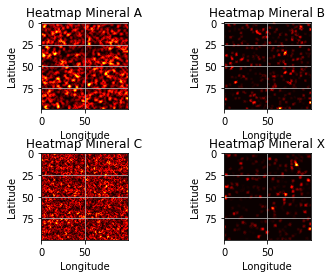

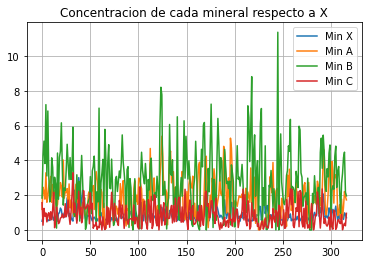

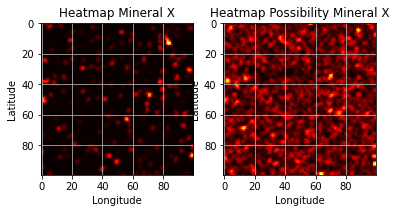

In [3]:
#4


#Se cargan los datos
ABC = np.load('data-ABC.npy')
X = np.load('data-X.npy')

minA= ABC[:,:,0]
minB= ABC[:,:,1]
minC= ABC[:,:,2]


#Grafica de los datos
plt.figure()
plt.subplot(2,2,1)
plt.title('Heatmap Mineral A')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.imshow(minA, cmap='hot')

plt.subplot(2,2,2)
plt.title('Heatmap Mineral B')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.imshow(minB, cmap='hot')

plt.subplot(2,2,3)
plt.title('Heatmap Mineral C')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.imshow(minC, cmap='hot')

plt.subplot(2,2,4)
plt.title('Heatmap Mineral X')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.imshow(X, cmap='hot')
plt.subplots_adjust(hspace=0.5)


#Encuentra las coordenadas deconcentración de X junto con las concentraciones de los demas minerales

#La matriz se inicializa asumiendo que toda la grilla tiene mineral X, por eso tiene puntos 10000
matrixxx = np. zeros([len(X[:,0])*len(X[:,0]),6])
cont = 1

for i in range(len(X[:,0])):
    for j in range(len(X[:,0])):
        if( X[i,j] > 0.5):
            matrixxx[cont]= [ i, j, X[i,j], minA[i,j], minB[i,j],minC[i,j] ]
            cont+=1
            
#Se limpia la matriz. Solo los valores que sean distintos de 0 se tendràn en cuenta.

indice= np.where(matrixxx[:,0]>0 )
min = np.min(indice)
max = np.max(indice)

matrixxx= matrixxx[min:max, :]

#Ya tenemos nuestra matriz con los lugares donde se encuentra el mineral X junto con las concentraciones de los otros minerales. Ahora,la relacion entre las concentraciones.

posX = np.linspace(0, len(matrixxx[:,0]),len(matrixxx[:,0]))
x= matrixxx[:,2]
a= matrixxx[:,3]
b= matrixxx[:,4]
c= matrixxx[:,5]
plt.figure() 
plt.title("Concentracion de cada mineral respecto a X")
plt.grid()
plt.plot(posX, x, label="Min X" )
plt.plot(posX, a, label= "Min A" )
plt.plot(posX, b, label= "Min B" )
plt.plot(posX, c , label= "Min C")
plt.legend()

#Ahora se miraran las correlaciones entre las matrices de las concentraciones de los minerales. La idea de este paso es saber si existe una correlación entre sus concentraciones y que porcentaje representa.

corXA= np.corrcoef(x,a)
corXB= np.corrcoef(x,b)
corXC= np.corrcoef(x,c)
print("Correlacion X,A: ", corXA)
print("Correlacion X,B: ", corXB)
print("Correlacion X,C: ", corXC)

coefA= corXA[1,0]
coefB= corXB[1,0]
coefC= corXC[1,0]

#Se extrapola los coeficientes de correlacion para que sumados sean unn 100%

tot= (coefA+coefB+coefC)

coefA= 100* coefA/tot 
coefB= 100* coefB/tot 
coefC= 100* coefC/tot 

#Se crea una formula que relaciona las concentraciones con sus coeficientes
def posibilidad( A, B, C ):
    return coefA*A + coefB*B+ coefC*C


#Crea una matriz con las posibilidades usando la formula

matrizPosibilidad= np.zeros([len(X[:,0]),len(X[:,0])])
for i in range(len(X[:,0])):
    for j in range(len(X[:,0])):
        aActual= minA[i,j]
        bActual= minB[i,j]
        cActual= minC[i,j]
        matrizPosibilidad[i,j] = posibilidad(aActual, bActual,cActual)

#Comparacion con el mapa real y de creado a partir de las posibilidades
plt.figure()
plt.subplot(1,2,1)
plt.title('Heatmap Mineral X')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.imshow(X, cmap='hot')

plt.subplot(1,2,2)
plt.title('Heatmap Possibility Mineral X')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.imshow(matrizPosibilidad, cmap='hot')
plt.show()
